# Машинное обучение, ФКН ВШЭ

# Практическое задание 11. Несбалансированные задачи

## Общая информация
Дата выдачи: 24.04.2025

Мягкий дедлайн: 13.05.2025 23:59 MSK

Жесткий дедлайн: 18.05.2025 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-xx-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

## О задании

В этом задании мы разберем основные техники работы в задачах, где один из классов занимает существенно меньшую долю выборки, чем остальные. Для простоты мы обойдемся бинарной задачей, тем не менее, во многом данные методы можно перенести и на задачи с б**о**льшим числом классов. Кроме того, вы получите очередной бесценный опыт исследования случайной библиотеки случайных индусов с нуля.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from tqdm.auto import tqdm

**Задание -1 (1 балл)**. EDA

В качестве данных для нашей работы возьмем выложенный на kaggle датасет транзакций, в котором нужно выискивать мошеннические проводки: [клик](https://www.kaggle.com/mlg-ulb/creditcardfraud). Данная задача по определению подходит под несбалансированную, что можно сказать даже без наличия каких-либо данных (понятно, что среди всех транзакций клиентов очень малая часть будет мошеннической).

Загрузим данные, проведем некоторые классические манипуляции.

In [ ]:
"""%%bash
kaggle datasets download -d mlg-ulb/creditcardfraud
unzip creditcardfraud.zip""";

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Наши данные были анонимизированы. Мы имеем 30 признаков, из которых 28 - это результаты PCA-преобразования на исходном датасете. Еще 2 признака представляют собой время в секундах, прошедшее с момента первой транзакции в датасете, и размер транзакции. Скажите, какова доля положительных объектов в выборке?

In [ ]:
#your code here
df["Class"].mean()

np.float64(0.001727485630620034)

Начнем с обработки времени. Секунды сами по себе не несут большой информации о зависимостях в данных, попробуйте по ним создать признаки "час" (от 0 до 23) и "день" (от 0 до ...) в аналогичной манере (принимая первый объект выборки за начальную точку). Сколько дней покрывают данные?

In [4]:
#your code here
df["Day"] = df["Time"] // 3600 // 24
df["Hour"] = df["Time"] // 3600 % 24

In [ ]:
df["Day"].unique()

array([0., 1.])

По моим подсчетам два дня.

Постройте следующие графики:

1. Распределение числа транзакций по каждому часу (line-plot).
2. Распределение доли мошеннических транзакций по каждому часу (line-plot)
3. То же самое для дней (здесь можно использовать bar-plot, так как дней должно быть немного).

Какие выводы можно сделать из графиков? На ваш взгляд, как можно связать полученные нами часы с реальными часами в сутках?

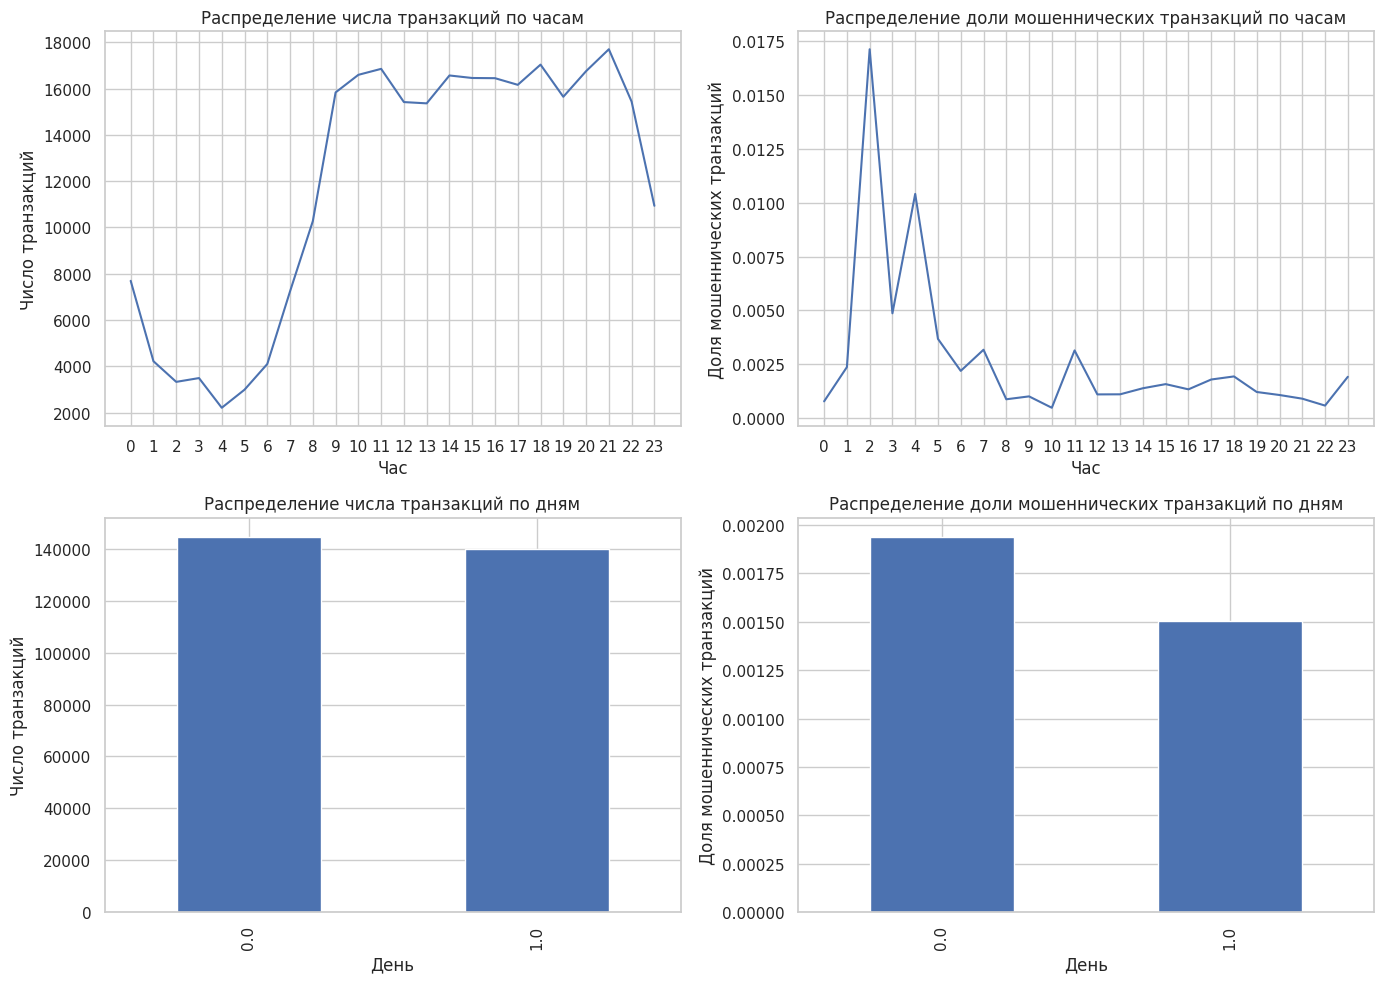

In [ ]:
#your code here
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
transactions_per_hour = df.groupby('Hour')['Hour'].count()
transactions_per_hour.plot(kind='line')
plt.title('Распределение числа транзакций по часам')
plt.xlabel('Час')
plt.ylabel('Число транзакций')
plt.xticks(range(0, 24))
plt.grid(True)

plt.subplot(2, 2, 2)
fraud_prop_per_hour = df.groupby('Hour')['Class'].mean()
fraud_prop_per_hour.plot(kind='line')
plt.title('Распределение доли мошеннических транзакций по часам')
plt.xlabel('Час')
plt.ylabel('Доля мошеннических транзакций')
plt.xticks(range(0, 24))
plt.grid(True)

plt.subplot(2, 2, 3)
transactions_per_day = df.groupby('Day')['Day'].count()
transactions_per_day.plot(kind='bar')
plt.title('Распределение числа транзакций по дням')
plt.xlabel('День')
plt.ylabel('Число транзакций')
plt.grid(True)

plt.subplot(2, 2, 4)
fraud_prop_per_day = df.groupby('Day')['Class'].mean()
fraud_prop_per_day.plot(kind='bar')
plt.title('Распределение доли мошеннических транзакций по дням')
plt.xlabel('День')
plt.ylabel('Доля мошеннических транзакций')
plt.grid(True)

plt.tight_layout()
plt.show()

Видно, что число транзакций зацикливается (оно и логично, т.к. люди идут спать). Врменной промежуток основной активности тоже понятен (с 9 до 9). Мошенники активизируются ночью, а еще немного в обед (после еды расслабились граждане).

С анонимизированными признаками вряд ли можно придумать что-то интересное. Попробуйте (например, с помощью корреляции?) выбрать несколько наиболее важных признаков и поглядеть на различия в их распределении для разных классов.

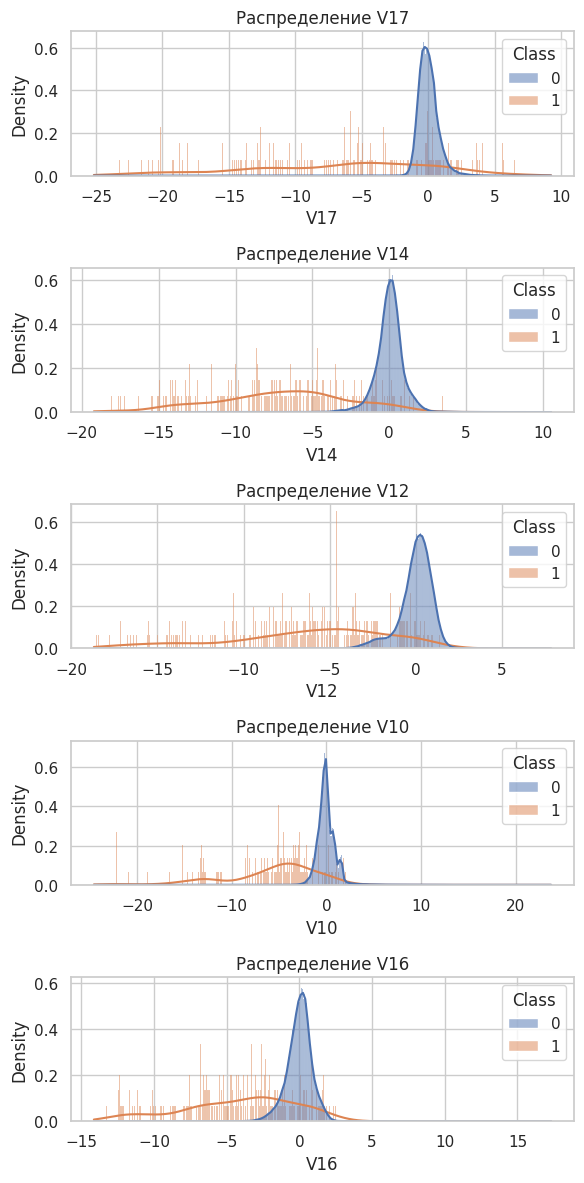

In [ ]:
#your code here
correlations = df.corr()['Class'].sort_values(ascending=False)
important_features = correlations.drop('Class').abs().nlargest(5).index.tolist()

plt.figure(figsize=(6, 12))
for i, feature in enumerate(important_features):
    plt.subplot(len(important_features), 1, i + 1)
    sns.histplot(data=df, x=feature, hue='Class', kde=True, stat='density', common_norm=False)
    plt.title(f'Распределение {feature}')

plt.tight_layout()
plt.show()

Теперь давайте разделим данные. Отделите хронологически последние 20% транзакций и поделите их пополам (также хронологически, т.е. без перемешивания) на валидационные и тестовые. Это разбиение не совсем корректно (как можно было заметить, мошеннические транзакции имеют разное распределение во времени - по-хорошему, нам стоило бы выделить целые сутки записей как под валидацию, так и под тест), тем не менее, мы не сможем получить больше данных для адекватного контроля, поэтому обойдемся этим.

In [5]:
split_index = int(len(df) * 0.8)
df_train = df[:split_index]
temp = df[split_index:]
df_val = temp[:len(temp) // 2]
df_test = temp[len(temp) // 2:]

# Часть 1. Несбалансированная классификация.

**Задание 0. (1 балл)**: перед началом работы давайте поговорим о том, как мы будем оценивать качество. Классические метрики для качества классификации чаще всего "ломаются" на задачах с сильным перекосом. Чему будет равно значение accuracy для наивного предсказания (= мажорный класс для каждого объекта)? (можете не отвечать, просто подумайте)

Из курса МО-1 вам уже известно, что мы можем использовать в таких задачах `AUC-PR` и получать адекватные показатели. Можно сказать, что `AUC-PR` представляет собой матожидание `precision` по распределению, заданному выигрышем в `recall` при смене порога.

In [6]:
#your code here
from sklearn.metrics import average_precision_score, auc, precision_recall_curve

def auc_pr(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    return auc(recall, precision)

Тем не менее, существуют и другие, не менее интересные метрики. Одной из таких метрик является коэффициент Каппа Коэна, представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_o - p_e}{1 - p_e}$$

Данная метрика служит в качестве меры согласованности между двумя независимыми предсказателями, но ничего не знает про "верные" и "предсказанные" метки (в отличие от многих других метрик машинного обучения). Здесь $p_o$ - доля согласованных предсказаний, а $p_e$ - доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей. В нашем случае это работает так:

• В качестве $p_o$ берем accuracy

• В качестве $p_e$ примем следующую величину - вероятность случайного соглашения позитивных ответов (произведение долей позитивных ответов в обоих предсказаниях) плюс вероятность случайного соглашения негативных ответов (произведение долей негативных ответов в обоих предсказаниях)

Метрика принимает значения от -1 до 1, где 1 - полная согласованность, 0 - согласованность на уровне рандома, -1 - совсем плохо. Как уже говорилось, метрика не различает "верные" и "предсказанные" метки, поэтому является симметричной (можете использовать это для отладки):

In [7]:
#your code here
from sklearn.metrics import cohen_kappa_score, accuracy_score

def cks(y_true, y_pred):
    p_0 = accuracy_score(y_true, y_pred)
    p_e = y_true.mean() * y_pred.mean() + (1 - y_true).mean() * (1 - y_pred).mean()
    return (p_0 - p_e) / (1 - p_e)

Еще одной метрикой в такой задаче служит коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$\text{MCC} = \frac{TP\times TN - FP \times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$

Метрика принимает значения от -1 до 1, интерпретируемые аналогичным образом.

In [8]:
#your code here
from sklearn.metrics import matthews_corrcoef, confusion_matrix

def mcc(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

Обратите внимание, что эти метрики вычисляются на бинаризованных предсказаниях, поэтому может иметь смысл дополнительная настройка порога бинаризации.

Давайте проверим, что наши метрики действительно подходят под задачу. Вычислите их значения для наивного предсказания (aka мажорный класс для всех объектов):

In [ ]:
#your code here
y_true = df_test['Class']
y_pred_naive = np.zeros_like(y_true)

auc_pr_naive = auc_pr(y_true, y_pred_naive)
print(f"AUC-PR: {auc_pr_naive}")

kappa_naive = cks(y_true, y_pred_naive)
print(f"CKS: {kappa_naive:.4f}")

mcc_naive = mcc(y_true, y_pred_naive)
print(f"MCC: {mcc_naive:.4f}")

AUC-PR: 0.5003862223938766
CKS: 0.0000
MCC: nan


<ipython-input-51-8aac5306ffba>:6: RuntimeWarning: invalid value encountered in scalar divide
  return (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))


Давайте запустим бейзлайн-решение для нашей задачи. С чего же начнем? Возьмите `catboost` и обучите его классификатор на наших данных (используйте все признаки). Вычислите значения всех метрик на тестовой части, для контроля переобучения используйте валидационную (здесь и далее везде, где фигурирует `catboost`).

In [9]:
X_train = df_train.drop('Class', axis=1)
y_train = df_train['Class']
X_val = df_val.drop('Class', axis=1)
y_val = df_val['Class']
X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class']

In [10]:
!pip install catboost optuna

import optuna
from catboost import CatBoostClassifier

In [ ]:
import optuna
from catboost import CatBoostClassifier

def objective(trial):
    params = {
        'n_estimators' : trial.suggest_int('n_estimators', 1, 100),
        'learning_rate' : trial.suggest_float('learning_rate', 0, 1),
        'depth' : trial.suggest_int('depth', 3, 7),
    }

    boosting = CatBoostClassifier(**params, verbose=0)
    boosting.fit(X_train, y_train)
    return boosting.score(X_val, y_val)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

boosting = CatBoostClassifier(**study.best_params, verbose=0).fit(X_train, y_train)
y_pred = boosting.predict(X_test)

In [ ]:
print(study.best_params)

{'n_estimators': 61, 'learning_rate': 0.34393075753724783, 'depth': 6}


In [ ]:
#your code here
print(f"AUC-PR: {auc_pr(y_test, y_pred)}")
print(f"CKS: {cks(y_test, y_pred)}")
print(f"MCC: {mcc(y_test, y_pred)}")

AUC-PR: 0.6867433153202614
CKS: 0.6826996662053398
MCC: 0.6845372504507213


Если вы все сделали правильно, у вас должны были получиться значения в районе 0.7.

**Задание 1. (1 балл)**. Многие реализации методов предлагают встроенные способы для борьбы с нашей проблемой. Самое часто встречающееся решение - просто добавить вес в функции потерь для минорного класса (таким образом, ошибка на объекте минорного класса будет весить больше, чем для мажорного). В `catboost` это также реализовано, причем для бинарной задачи это можно сделать целыми двумя способами (можете выбрать любой, на свой вкус, автор задания предпочитает отдельный скейлинг для минорного класса). Чаще всего в качестве веса берется отношение числа объектов мажорного класса к числу минорного. Попробуйте обучить модель с таким скалированием и сравните метрики на тестовой части с бейзлайном.

In [ ]:
#your code here

weighted = CatBoostClassifier(**study.best_params, class_weights=[1, (1 - y_train).sum() / y_train.sum()], verbose=False).fit(X_train, y_train)
y_pred = weighted.predict(X_test)

print(f"AUC-PR: {auc_pr(y_test, y_pred)}")
print(f"CKS: {cks(y_test, y_pred)}")
print(f"MCC: {mcc(y_test, y_pred)}")

AUC-PR: 0.6218062131455442
CKS: 0.603415225090152
MCC: 0.612324475034746


Поскольку данный вес будет являться гиперпараметром метода, было бы опрометчиво остановиться на одном значении (тем более, с большой вероятностью у вас все сломалось). Запустите перебор для этого гиперпараметра на валидационной выборке (используйте `PR-AUC`), подберите оптимальный порог бинаризации для $\kappa$ или $\text{MCC}$. Для лучшего найденного веса и порога вычислите все метрики на тестовой части.

При этом можете также проверить отдельное скалирование в большую сторону для мажорного класса (т.е. веса минорного сделать меньше 1) и экстремальные скалирования (т.е. веса минорного больше, чем в начале этого задания). Какой вес получился оптимальным?

In [ ]:
#your code here
def objective(trial):
    params = {
        'n_estimators' : trial.suggest_int('n_estimators', 1, 100),
        'learning_rate' : trial.suggest_float('learning_rate', 0, 1),
        'depth' : trial.suggest_int('depth', 3, 7),
        'scale_pos_weight' : trial.suggest_int('scale_pos_weight', 30, 300)
    }
    boosting = CatBoostClassifier(**params, verbose=0).fit(X_train, y_train)
    y_pred = boosting.predict(X_val)
    return auc_pr(y_val, y_pred)

study_scale = optuna.create_study(direction='maximize')
study_scale.optimize(objective, n_trials=20)

[I 2025-05-14 10:35:31,407] A new study created in memory with name: no-name-490f499e-5ed8-47b4-9870-221b886e4ddb
[I 2025-05-14 10:35:36,814] Trial 0 finished with value: 0.724544526291278 and parameters: {'n_estimators': 61, 'learning_rate': 0.3349937635548077, 'depth': 4, 'scale_pos_weight': 117}. Best is trial 0 with value: 0.724544526291278.
[I 2025-05-14 10:35:40,827] Trial 1 finished with value: 0.6983940965608982 and parameters: {'n_estimators': 69, 'learning_rate': 0.9442977712271786, 'depth': 3, 'scale_pos_weight': 213}. Best is trial 0 with value: 0.724544526291278.
[I 2025-05-14 10:35:45,823] Trial 2 finished with value: 0.6745859329920709 and parameters: {'n_estimators': 73, 'learning_rate': 0.1163386983202308, 'depth': 4, 'scale_pos_weight': 64}. Best is trial 0 with value: 0.724544526291278.
[I 2025-05-14 10:35:52,643] Trial 3 finished with value: 0.7942533795563588 and parameters: {'n_estimators': 71, 'learning_rate': 0.4102010784473792, 'depth': 7, 'scale_pos_weight': 2

In [ ]:
def objective(trial):
    threshold = trial.suggest_float('threshold', 0, 1)
    boosting = CatBoostClassifier(**study_scale.best_params, verbose=0).fit(X_train, y_train)
    boosting.set_probability_threshold(threshold)
    y_pred = boosting.predict(X_val)
    return cks(y_val, y_pred)

study_thr = optuna.create_study(direction='maximize')
study_thr.optimize(objective, n_trials=20)

[I 2025-05-14 10:37:52,588] A new study created in memory with name: no-name-b7774ee0-fc98-475c-abc4-e3e191b666c4
[I 2025-05-14 10:37:59,275] Trial 0 finished with value: 0.8258121384432856 and parameters: {'threshold': 0.8336740510560513}. Best is trial 0 with value: 0.8258121384432856.
[I 2025-05-14 10:38:07,314] Trial 1 finished with value: 0.8128960256099498 and parameters: {'threshold': 0.9576406281495586}. Best is trial 0 with value: 0.8258121384432856.
[I 2025-05-14 10:38:13,995] Trial 2 finished with value: 0.8364551990261079 and parameters: {'threshold': 0.2832794994683804}. Best is trial 2 with value: 0.8364551990261079.
[I 2025-05-14 10:38:21,993] Trial 3 finished with value: 0.8384510754991502 and parameters: {'threshold': 0.6374661222235909}. Best is trial 3 with value: 0.8384510754991502.
[I 2025-05-14 10:38:30,041] Trial 4 finished with value: 0.8384510754991502 and parameters: {'threshold': 0.5479759330522649}. Best is trial 3 with value: 0.8384510754991502.
[I 2025-05-

In [ ]:
study_thr.best_params['threshold']

0.4485754968375252

In [ ]:
thrs = CatBoostClassifier(**study_scale.best_params, verbose=0).fit(X_train, y_train)
thrs.set_probability_threshold(study_thr.best_params['threshold'])
y_pred = thrs.predict(X_test)
print(f"AUC-PR: {auc_pr(y_test, y_pred)}")
print(f"CKS: {cks(y_test, y_pred)}")
print(f"MCC: {mcc(y_test, y_pred)}")

AUC-PR: 0.7637416970165118
CKS: 0.761729475404941
MCC: 0.7625958622585118


**Задание 2. (1 балл)**. На самом деле, то, что мы сейчас делали, очень схоже с другой распространенной техникой - оверсэмплингом. Фактически, мы можем продублировать все объекты минорного класса и получить тот же эффект, какой был бы при использовании веса, равного 2. Тем не менее, такой подход - это лишь малая часть того, что мы можем проделать с целью повысить число объектов минорного класса.

Для продолжения работы установим библиотеку [imbalanced-learn](https://imbalanced-learn.org/stable/):

In [ ]:
!pip3 install imbalanced-learn
# conda install -c conda-forge imbalanced-learn

Первый метод, которым мы воспользуемся, называется SMOTE (его вы уже разбирали на лекции). Кратко напомним суть: мы выбираем случайного кандидата среди $k$ ближайших соседей объекта минорного класса, затем берем точку на отрезке между двумя объектами (т.е. выпуклую комбинацию со случайными коэффициентами) и добавляем в выборку.

In [ ]:
from imblearn.over_sampling import SMOTE

Используйте SMOTE для ресэмплинга обучающей выборки, на новой выборке обучите модель (вес положительных объектов скалировать не нужно). Замерьте качество на тестовой выборке (**важно!** не преобразовывайте валидационную и тестовую выборку никак - мы не хотим отслеживать качество на объектах, которых в реальности не существует). Сравните полное выравнивание выборки с частичным (т.е. таким, что баланс классов улучшается, но не достигает равенства - скажем, 1:2 и 1:10).

In [ ]:
#your code here
sm = SMOTE(random_state=42)
train_x, train_y = sm.fit_resample(X_train, y_train)

def objective(trial):
    params = {
        'n_estimators' : trial.suggest_int('n_estimators', 1, 100),
        'learning_rate' : trial.suggest_float('learning_rate', 0, 1),
        'depth' : trial.suggest_int('depth', 3, 7),
    }
    threshold = trial.suggest_float('threshold', 0, 1)
    boosting = CatBoostClassifier(**params, verbose=0).fit(train_x, train_y)
    boosting.set_probability_threshold(threshold)
    y_pred = boosting.predict(X_val)
    return auc_pr(y_val, y_pred)

smote_full = optuna.create_study(direction='maximize')
smote_full.optimize(objective, n_trials=20)

[I 2025-05-14 11:10:36,947] A new study created in memory with name: no-name-1b941f5a-a94d-419c-8522-b92a98d24424
[I 2025-05-14 11:10:42,578] Trial 0 finished with value: 0.49607976225887007 and parameters: {'n_estimators': 26, 'learning_rate': 0.24703666328521767, 'depth': 5, 'threshold': 0.22589582759832383}. Best is trial 0 with value: 0.49607976225887007.
[I 2025-05-14 11:10:55,716] Trial 1 finished with value: 0.7812338888212542 and parameters: {'n_estimators': 96, 'learning_rate': 0.9119947452190571, 'depth': 6, 'threshold': 0.6004402507633085}. Best is trial 1 with value: 0.7812338888212542.
[I 2025-05-14 11:10:57,867] Trial 2 finished with value: 0.48258736420624715 and parameters: {'n_estimators': 7, 'learning_rate': 0.02620746014273978, 'depth': 6, 'threshold': 0.4150709671307097}. Best is trial 1 with value: 0.7812338888212542.
[I 2025-05-14 11:11:11,107] Trial 3 finished with value: 0.6494315744840491 and parameters: {'n_estimators': 89, 'learning_rate': 0.3380243071924104,

In [ ]:
temp_params = dict(smote_full.best_params)
del temp_params['threshold']
smote_full.best_params

{'n_estimators': 86,
 'learning_rate': 0.28721809742455284,
 'depth': 6,
 'threshold': 0.7619158830097371}

In [ ]:
smote = CatBoostClassifier(**temp_params, verbose=0).fit(train_x, train_y)
smote.set_probability_threshold(smote_full.best_params['threshold'])
y_pred = smote.predict(X_test)

print(f"AUC-PR: {auc_pr(y_test, y_pred)}")
print(f"CKS: {cks(y_test, y_pred)}")
print(f"MCC: {mcc(y_test, y_pred)}")

AUC-PR: 0.7115677839730336
CKS: 0.7108828212297992
MCC: 0.7110586906187203


In [ ]:
sm = SMOTE(sampling_strategy=1/2, random_state=42)
train_x, train_y = sm.fit_resample(X_train, y_train)

smote_half = optuna.create_study(direction='maximize')
smote_half.optimize(objective, n_trials=20)

temp_params = dict(smote_half.best_params)
del temp_params['threshold']

smote = CatBoostClassifier(**temp_params, verbose=0).fit(train_x, train_y)
smote.set_probability_threshold(smote_half.best_params['threshold'])
y_pred = smote.predict(X_test)

print(f"AUC-PR: {auc_pr(y_test, y_pred)}")
print(f"CKS: {cks(y_test, y_pred)}")
print(f"MCC: {mcc(y_test, y_pred)}")

[I 2025-05-14 11:17:02,187] A new study created in memory with name: no-name-1ff0650d-6c9b-4d86-93de-8860946e45d7
[I 2025-05-14 11:17:10,528] Trial 0 finished with value: 0.613450537891062 and parameters: {'n_estimators': 90, 'learning_rate': 0.1437214282601903, 'depth': 3, 'threshold': 0.5921048008256766}. Best is trial 0 with value: 0.613450537891062.
[I 2025-05-14 11:17:16,787] Trial 1 finished with value: 0.8321321674351467 and parameters: {'n_estimators': 80, 'learning_rate': 0.44741987908126335, 'depth': 3, 'threshold': 0.9556238114868286}. Best is trial 1 with value: 0.8321321674351467.
[I 2025-05-14 11:17:19,159] Trial 2 finished with value: 0.5308400444181134 and parameters: {'n_estimators': 14, 'learning_rate': 0.0986016605600234, 'depth': 5, 'threshold': 0.33353474385014625}. Best is trial 1 with value: 0.8321321674351467.
[I 2025-05-14 11:17:25,186] Trial 3 finished with value: 0.5001721020983547 and parameters: {'n_estimators': 60, 'learning_rate': 0.7187285095237654, 'dep

AUC-PR: 0.8343299323106295
CKS: 0.8203918699904673
MCC: 0.8272276657666917


НИЧОСИ!

In [ ]:
sm = SMOTE(sampling_strategy=1/10, random_state=42)
train_x, train_y = sm.fit_resample(X_train, y_train)

smote_frac = optuna.create_study(direction='maximize')
smote_frac.optimize(objective, n_trials=20)

temp_params = dict(smote_frac.best_params)
del temp_params['threshold']

smote = CatBoostClassifier(**temp_params, verbose=0).fit(train_x, train_y)
smote.set_probability_threshold(smote_frac.best_params['threshold'])
y_pred = smote.predict(X_test)

print(f"AUC-PR: {auc_pr(y_test, y_pred)}")
print(f"CKS: {cks(y_test, y_pred)}")
print(f"MCC: {mcc(y_test, y_pred)}")

[I 2025-05-14 11:19:28,614] A new study created in memory with name: no-name-e96a8f5b-29cb-46cb-9f5b-31a03446f344
[I 2025-05-14 11:19:31,211] Trial 0 finished with value: 0.7523517296811084 and parameters: {'n_estimators': 32, 'learning_rate': 0.985406895482341, 'depth': 4, 'threshold': 0.6559521300804017}. Best is trial 0 with value: 0.7523517296811084.
[I 2025-05-14 11:19:33,280] Trial 1 finished with value: 0.8437800622864601 and parameters: {'n_estimators': 25, 'learning_rate': 0.07601532312587012, 'depth': 3, 'threshold': 0.9154382437211069}. Best is trial 1 with value: 0.8437800622864601.
[I 2025-05-14 11:19:37,709] Trial 2 finished with value: 0.6107052405769923 and parameters: {'n_estimators': 74, 'learning_rate': 0.7387110923517101, 'depth': 3, 'threshold': 0.1457715713607889}. Best is trial 1 with value: 0.8437800622864601.
[I 2025-05-14 11:19:39,715] Trial 3 finished with value: 0.5787783354347527 and parameters: {'n_estimators': 5, 'learning_rate': 0.5301710454215475, 'dept

AUC-PR: 0.7273780606528755
CKS: 0.7270618976582063
MCC: 0.7270618976581941


**Бонус (1.5 балла)**. Для vanilla SMOTE существуют некоторые модификации, часть из которых была реализована в библиотеке imblearn. Во время лекций/семинаров эти модификации не рассматривались, тем не менее, мы все равно их исследуем.

Найдите статьи о следующих методах и попробуйте вкратце сформулировать, в чем их основная идея (сделайте так, чтобы человек, знакомый с машинным обучением в целом, но не слышавший конкретно про это смог понять):

BorderlineSMOTE - [Для](https://sci2s.ugr.es/keel/keel-dataset/pdfs/2005-Han-LNCS.pdf) каждого объекта из миноргоно класса изем m ближайших соседей, затем смотрим среди них число объектов мажорного класса m'. Если m' = m или m' < m/2, то скип, иначе DANGER. Для каждого такого ищем k ближайших соседей, из них выбираме s, ищем расстояния до них от элемента. Новый генерируется как элемент + рандомные числа на расстояния (это векторы).

SVM-SMOTE - [Тут](https://core.ac.uk/download/pdf/12531531.pdf) как нетрудно догадаться используют SVM для нахождения опорных векторов минорного класса. К ним ищут n ближайших соседей, если среди них минорных меньше половины, то к опорному элементу добавляется разность между ним и j-ым соседом, умноженная на рандомное от 0 до 1, в обратном случае на от -1 до 0.

K-Means-SMOTE - [Здесь](https://arxiv.org/abs/1711.00837) невероятно, но факт - используется KMeans для кластеризации всех данных, затем выбираются кластеры с большим числом миноритариев. Далее для каждого фильтрованного считаем вес, который затем используется вместе с обычным SMOTE для генерации точек (вес влияет на количество).

ADASYN -[Теперь](https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf) считаем число имбаланстности (отношение размеров), затем считаем чсило генерируемых объектов (зависит от отношения классов и гиперпараметра). Для миноритариев ищем ближайших соседей, считаем отношения (смотри на мажоритариев среди соседей) и нормализуем их для получения распределения. Используя все это находим число новых объектов для каждого такого миноритария. Затем по этому числу мешаем как выпуклая комбинация элемент с его соседями (в итоге балансируем все и оставляем "каверзные примеры", как увидим ниже это хорошо сработало).

Теперь попробуйте сравнить качество всех методов на наших данных.

In [ ]:
#your code here
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, ADASYN

def evaluate_and_print(model_name, y_pred):
    print(f"---- {model_name} ----")
    print(f"AUC-PR: {auc_pr(y_test, y_pred)}")
    print(f"CKS: {cks(y_test, y_pred)}")
    print(f"MCC: {mcc(y_test, y_pred)}")


methods = {
    'KMeansSMOTE': KMeansSMOTE(random_state=42, cluster_balance_threshold=0.0005),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'SVMSMOTE': SVMSMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}

for method_name, method in methods.items():
    train_x, train_y = method.fit_resample(X_train, y_train)

    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1, 100),
            'learning_rate': trial.suggest_float('learning_rate', 0, 1),
            'depth': trial.suggest_int('depth', 3, 7)
        }
        threshold = trial.suggest_float('threshold', 0, 1)
        boosting = CatBoostClassifier(**params, verbose=0).fit(train_x, train_y)
        boosting.set_probability_threshold(threshold)
        y_pred = boosting.predict(X_val)
        return auc_pr(y_val, y_pred)

    study_smote = optuna.create_study(direction='maximize')
    study_smote.optimize(objective, n_trials=20)
    temp_params = dict(study_smote.best_params)
    del temp_params['threshold']

    smote = CatBoostClassifier(**temp_params, verbose=0).fit(train_x, train_y)
    smote.set_probability_threshold(study_smote.best_params['threshold'])
    y_pred = smote.predict(X_test)

    evaluate_and_print(method_name, y_pred)

[I 2025-05-14 11:34:32,454] A new study created in memory with name: no-name-9527c927-0eeb-403b-974f-92891002cd95
[I 2025-05-14 11:34:40,710] Trial 0 finished with value: 0.8736922535640052 and parameters: {'n_estimators': 54, 'learning_rate': 0.5246362122248988, 'depth': 5, 'threshold': 0.3904220387586792}. Best is trial 0 with value: 0.8736922535640052.
[I 2025-05-14 11:34:53,467] Trial 1 finished with value: 0.7069242056770054 and parameters: {'n_estimators': 81, 'learning_rate': 0.6744664210583249, 'depth': 4, 'threshold': 0.9511634456703846}. Best is trial 0 with value: 0.8736922535640052.
[I 2025-05-14 11:35:02,979] Trial 2 finished with value: 0.8537771890801683 and parameters: {'n_estimators': 72, 'learning_rate': 0.3164024069168716, 'depth': 4, 'threshold': 0.5230693936146865}. Best is trial 0 with value: 0.8736922535640052.
[I 2025-05-14 11:35:12,013] Trial 3 finished with value: 0.719496449368201 and parameters: {'n_estimators': 34, 'learning_rate': 0.11691129700391001, 'dep

---- KMeansSMOTE ----
AUC-PR: 0.6364514141804265
CKS: 0.606774023496326
MCC: 0.6212320398261317


[I 2025-05-14 11:37:24,573] A new study created in memory with name: no-name-98975e2a-0c36-4da7-a491-0a9e2d5f9f6c
[I 2025-05-14 11:37:28,494] Trial 0 finished with value: 0.7284639058721483 and parameters: {'n_estimators': 14, 'learning_rate': 0.6680939280948688, 'depth': 7, 'threshold': 0.6052597177013942}. Best is trial 0 with value: 0.7284639058721483.
[I 2025-05-14 11:37:38,260] Trial 1 finished with value: 0.7085856730261971 and parameters: {'n_estimators': 84, 'learning_rate': 0.09852542311369039, 'depth': 3, 'threshold': 0.47257899231291256}. Best is trial 0 with value: 0.7284639058721483.
[I 2025-05-14 11:37:42,729] Trial 2 finished with value: 0.8324560204746134 and parameters: {'n_estimators': 36, 'learning_rate': 0.4976648146013928, 'depth': 4, 'threshold': 0.8174396304553334}. Best is trial 2 with value: 0.8324560204746134.
[I 2025-05-14 11:37:53,102] Trial 3 finished with value: 0.7351292037106327 and parameters: {'n_estimators': 98, 'learning_rate': 0.8988898060528323, 'd

---- BorderlineSMOTE ----
AUC-PR: 0.6714340047088195
CKS: 0.6663874946556728
MCC: 0.6687173797351023


[I 2025-05-14 11:41:05,965] A new study created in memory with name: no-name-fa3a5b19-2ba3-4034-9820-3ea7be347b39
[I 2025-05-14 11:41:21,123] Trial 0 finished with value: 0.7775867128896922 and parameters: {'n_estimators': 94, 'learning_rate': 0.49159384122876093, 'depth': 5, 'threshold': 0.295720669913242}. Best is trial 0 with value: 0.7775867128896922.
[I 2025-05-14 11:41:29,341] Trial 1 finished with value: 0.7737955724206738 and parameters: {'n_estimators': 60, 'learning_rate': 0.14902852821598223, 'depth': 4, 'threshold': 0.4582851520939383}. Best is trial 0 with value: 0.7775867128896922.
[I 2025-05-14 11:41:33,547] Trial 2 finished with value: 0.6012904784466163 and parameters: {'n_estimators': 37, 'learning_rate': 0.4495106200495149, 'depth': 3, 'threshold': 0.09896056519973528}. Best is trial 0 with value: 0.7775867128896922.
[I 2025-05-14 11:41:40,047] Trial 3 finished with value: 0.8031186277833091 and parameters: {'n_estimators': 40, 'learning_rate': 0.6155795408805212, 'd

---- SVMSMOTE ----
AUC-PR: 0.7847943285954593
CKS: 0.7803305381421584
MCC: 0.7824309099074692


[I 2025-05-14 11:44:17,479] A new study created in memory with name: no-name-2bb0cf40-7bff-487c-a117-8fe0ccca7cc2
[I 2025-05-14 11:44:31,900] Trial 0 finished with value: 0.7230686933609769 and parameters: {'n_estimators': 98, 'learning_rate': 0.9936562583752312, 'depth': 6, 'threshold': 0.6135519624084828}. Best is trial 0 with value: 0.7230686933609769.
[I 2025-05-14 11:44:39,530] Trial 1 finished with value: 0.6976091801965456 and parameters: {'n_estimators': 60, 'learning_rate': 0.6826068437269599, 'depth': 5, 'threshold': 0.5353418942044162}. Best is trial 0 with value: 0.7230686933609769.
[I 2025-05-14 11:44:53,498] Trial 2 finished with value: 0.696419526291278 and parameters: {'n_estimators': 95, 'learning_rate': 0.5945895223752595, 'depth': 5, 'threshold': 0.24855802484500988}. Best is trial 0 with value: 0.7230686933609769.
[I 2025-05-14 11:45:00,362] Trial 3 finished with value: 0.7466522423975026 and parameters: {'n_estimators': 43, 'learning_rate': 0.8941699115656183, 'dep

---- ADASYN ----
AUC-PR: 0.8081861414609562
CKS: 0.7998608632102646
MCC: 0.8038960655235946


**Задание 3. (1 балл)**. До этого момента все наши решения концентрировались на работе с минорным классом. Теперь давайте попробуем зайти с другой стороны. Может быть, для восстановления закономерностей нам не нужно столько объектов мажорного класса, и они просто засоряют нам выборку лишней информацией?

Для решения этой проблемы существуют методы андерсэмплинга. Самое простое, что можно придумать - удалять точки мажорного класса, пока мы не получим приемлемый баланс. Протестируйте следующий метод и постройте графики достигаемых значений метрик от баланса классов и от отношения размеров исходной и пересэмпленной выборки:

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

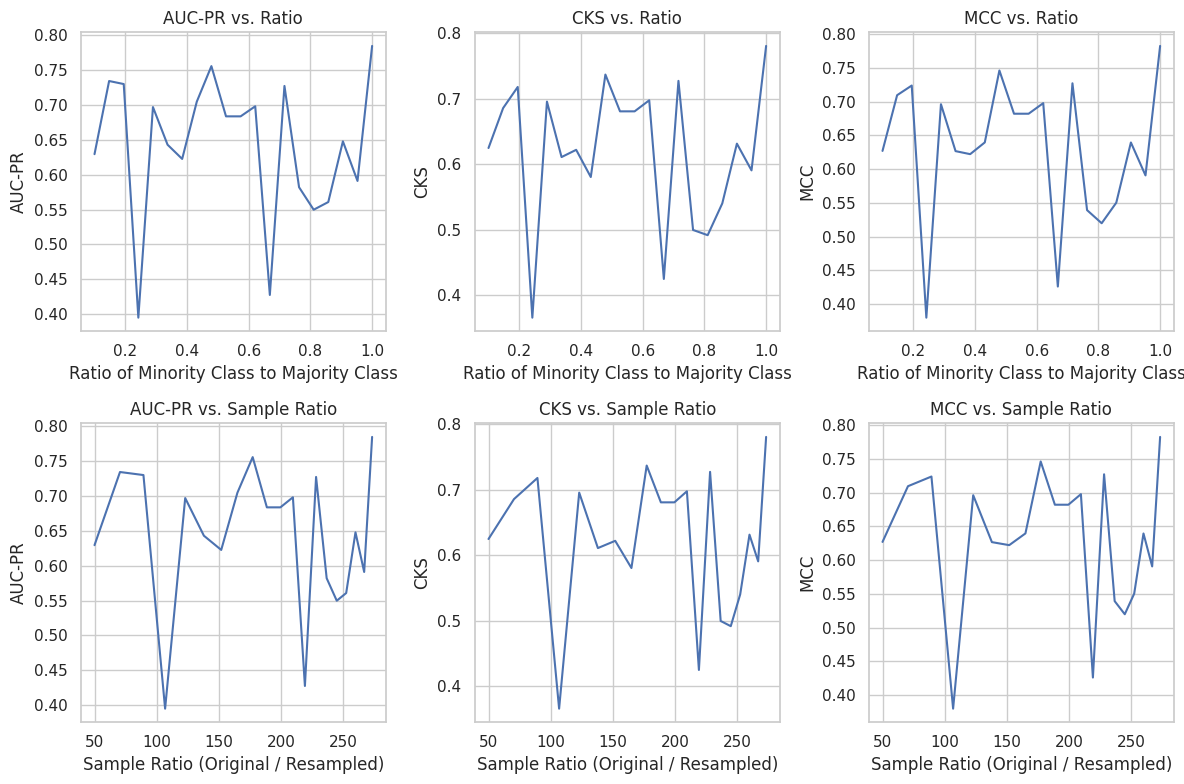

In [ ]:
#your code here
from IPython.display import clear_output

ratios = np.linspace(0.1, 1, 20)
auc_pr_scores = []
cks_scores = []
mcc_scores = []
sample_ratios = []

for ratio in tqdm(ratios):
    undersampler = RandomUnderSampler(sampling_strategy=ratio, random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
    sample_ratios.append(len(X_train) / len(X_resampled))

    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1, 100),
            'learning_rate': trial.suggest_float('learning_rate', 0, 1),
            'depth': trial.suggest_int('depth', 3, 7)
        }
        threshold = trial.suggest_float('threshold', 0, 1)
        boosting = CatBoostClassifier(**params, verbose=0).fit(X_resampled, y_resampled)
        boosting.set_probability_threshold(threshold)
        y_pred = boosting.predict(X_val)
        return auc_pr(y_val, y_pred)

    study_under = optuna.create_study(direction='maximize')
    study_under.optimize(objective, n_trials=20)

    temp_params = dict(study_under.best_params)
    del temp_params['threshold']

    undersampled_model = CatBoostClassifier(**temp_params, verbose=0).fit(X_resampled, y_resampled)
    undersampled_model.set_probability_threshold(study_under.best_params['threshold'])
    y_pred = undersampled_model.predict(X_test)


    auc_pr_scores.append(auc_pr(y_test, y_pred))
    cks_scores.append(cks(y_test, y_pred))
    mcc_scores.append(mcc(y_test, y_pred))

clear_output()
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(ratios, auc_pr_scores)
plt.xlabel("Ratio of Minority Class to Majority Class")
plt.ylabel("AUC-PR")
plt.title("AUC-PR vs. Ratio")

plt.subplot(2, 3, 2)
plt.plot(ratios, cks_scores)
plt.xlabel("Ratio of Minority Class to Majority Class")
plt.ylabel("CKS")
plt.title("CKS vs. Ratio")

plt.subplot(2, 3, 3)
plt.plot(ratios, mcc_scores)
plt.xlabel("Ratio of Minority Class to Majority Class")
plt.ylabel("MCC")
plt.title("MCC vs. Ratio")

plt.subplot(2, 3, 4)
plt.plot(sample_ratios, auc_pr_scores)
plt.xlabel("Sample Ratio (Original / Resampled)")
plt.ylabel("AUC-PR")
plt.title("AUC-PR vs. Sample Ratio")

plt.subplot(2, 3, 5)
plt.plot(sample_ratios, cks_scores)
plt.xlabel("Sample Ratio (Original / Resampled)")
plt.ylabel("CKS")
plt.title("CKS vs. Sample Ratio")

plt.subplot(2, 3, 6)
plt.plot(sample_ratios, mcc_scores)
plt.xlabel("Sample Ratio (Original / Resampled)")
plt.ylabel("MCC")
plt.title("MCC vs. Sample Ratio")

plt.tight_layout()
plt.show()

Даже такой наивный подход может дать относительно неплохие результаты и улучшить наши метрики. Тем не менее, сейчас мы никак не используем информацию о распределении объектов в выборке. Оказывается, что даже относительно простые эвристические правила могут заметно поднять нам качество - например, мы можем при отбрасывании использовать близость отдельных объектов мажорного класса к минорному и отбрасывать самые близкие. Протестируйте алгоритм [Near-Miss](https://www.site.uottawa.ca/~nat/Workshop2003/jzhang.pdf) на наших данных и постройте графики, аналогичные предыдущему пункту (также добавьте график с зависимостью качества от числа соседей).

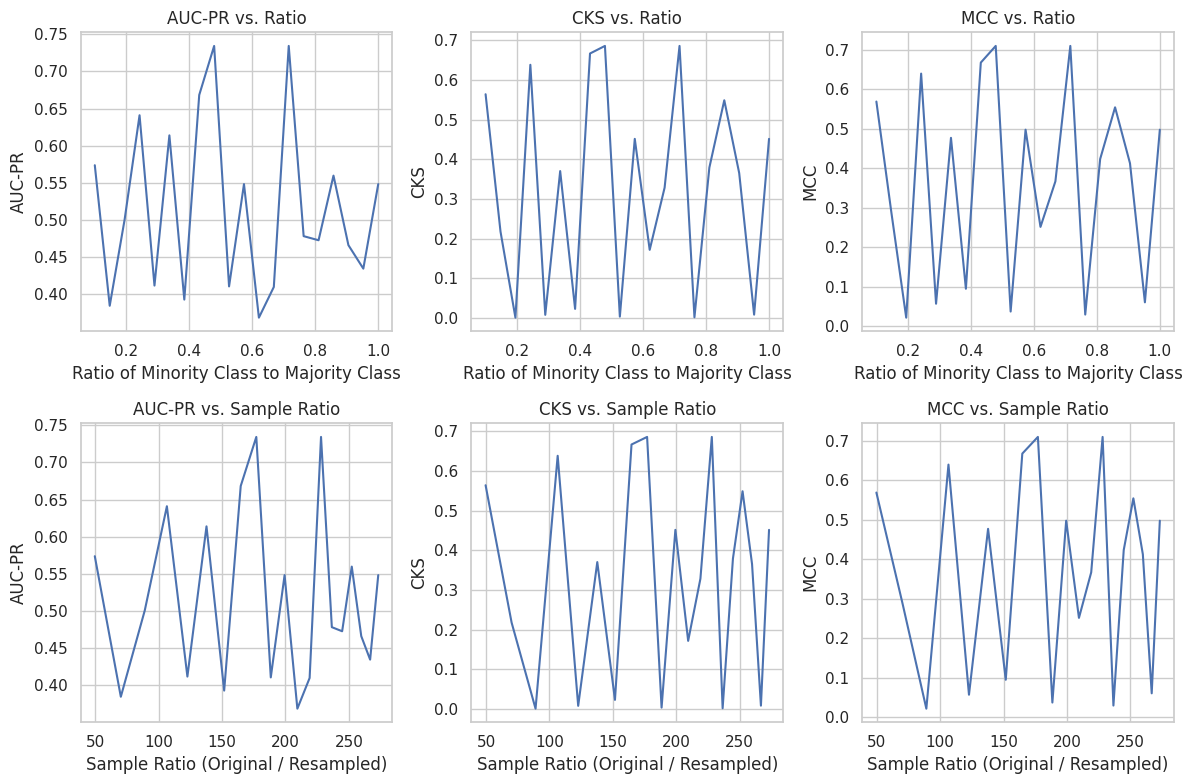

In [ ]:
from imblearn.under_sampling import NearMiss

#your code here
ratios = np.linspace(0.1, 1, 20)
auc_pr_scores = []
cks_scores = []
mcc_scores = []
sample_ratios = []

for ratio in tqdm(ratios):
    undersampler = NearMiss(sampling_strategy=ratio)
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
    sample_ratios.append(len(X_train) / len(X_resampled))

    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1, 100),
            'learning_rate': trial.suggest_float('learning_rate', 0, 1),
            'depth': trial.suggest_int('depth', 3, 7)
        }
        threshold = trial.suggest_float('threshold', 0, 1)
        boosting = CatBoostClassifier(**params, verbose=0).fit(X_resampled, y_resampled)
        boosting.set_probability_threshold(threshold)
        y_pred = boosting.predict(X_val)
        return auc_pr(y_val, y_pred)

    study_under = optuna.create_study(direction='maximize')
    study_under.optimize(objective, n_trials=20)

    temp_params = dict(study_under.best_params)
    del temp_params['threshold']

    undersampled_model = CatBoostClassifier(**temp_params, verbose=0).fit(X_resampled, y_resampled)
    undersampled_model.set_probability_threshold(study_under.best_params['threshold'])
    y_pred = undersampled_model.predict(X_test)


    auc_pr_scores.append(auc_pr(y_test, y_pred))
    cks_scores.append(cks(y_test, y_pred))
    mcc_scores.append(mcc(y_test, y_pred))

clear_output()
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(ratios, auc_pr_scores)
plt.xlabel("Ratio of Minority Class to Majority Class")
plt.ylabel("AUC-PR")
plt.title("AUC-PR vs. Ratio")

plt.subplot(2, 3, 2)
plt.plot(ratios, cks_scores)
plt.xlabel("Ratio of Minority Class to Majority Class")
plt.ylabel("CKS")
plt.title("CKS vs. Ratio")

plt.subplot(2, 3, 3)
plt.plot(ratios, mcc_scores)
plt.xlabel("Ratio of Minority Class to Majority Class")
plt.ylabel("MCC")
plt.title("MCC vs. Ratio")

plt.subplot(2, 3, 4)
plt.plot(sample_ratios, auc_pr_scores)
plt.xlabel("Sample Ratio (Original / Resampled)")
plt.ylabel("AUC-PR")
plt.title("AUC-PR vs. Sample Ratio")

plt.subplot(2, 3, 5)
plt.plot(sample_ratios, cks_scores)
plt.xlabel("Sample Ratio (Original / Resampled)")
plt.ylabel("CKS")
plt.title("CKS vs. Sample Ratio")

plt.subplot(2, 3, 6)
plt.plot(sample_ratios, mcc_scores)
plt.xlabel("Sample Ratio (Original / Resampled)")
plt.ylabel("MCC")
plt.title("MCC vs. Sample Ratio")

plt.tight_layout()
plt.show()

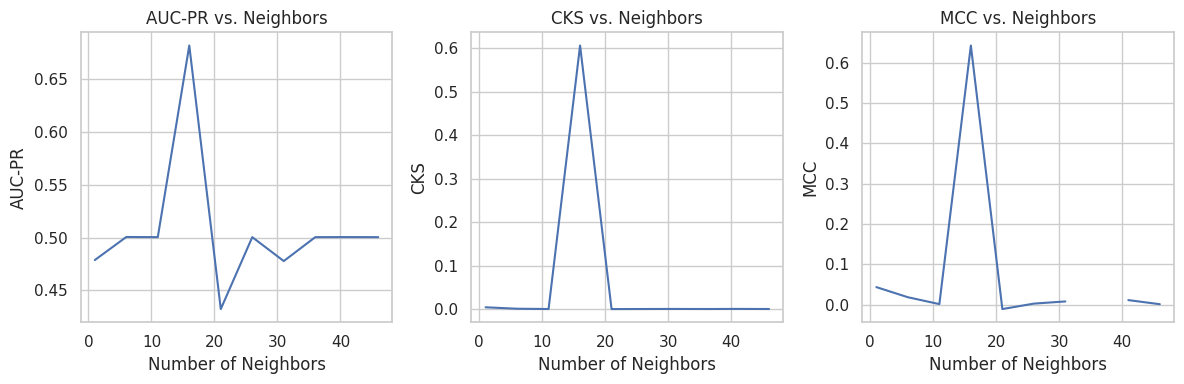

In [ ]:
from imblearn.under_sampling import NearMiss

n_neighbors_values = list(range(1, 50, 5))
auc_pr_scores_neighbors = []
cks_scores_neighbors = []
mcc_scores_neighbors = []

for n_neighbors in tqdm(n_neighbors_values):
    undersampler = NearMiss(n_neighbors=n_neighbors)
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 1, 100),
            'learning_rate': trial.suggest_float('learning_rate', 0, 1),
            'depth': trial.suggest_int('depth', 3, 7)
        }
        threshold = trial.suggest_float('threshold', 0, 1)
        boosting = CatBoostClassifier(**params, verbose=0).fit(X_resampled, y_resampled)
        boosting.set_probability_threshold(threshold)
        y_pred = boosting.predict(X_val)
        return auc_pr(y_val, y_pred)

    study_near_miss = optuna.create_study(direction='maximize')
    study_near_miss.optimize(objective, n_trials=20)

    temp_params = dict(study_near_miss.best_params)
    del temp_params['threshold']

    near_miss_model = CatBoostClassifier(**temp_params, verbose=0).fit(X_resampled, y_resampled)
    near_miss_model.set_probability_threshold(study_near_miss.best_params['threshold'])
    y_pred = near_miss_model.predict(X_test)

    auc_pr_scores_neighbors.append(auc_pr(y_test, y_pred))
    cks_scores_neighbors.append(cks(y_test, y_pred))
    mcc_scores_neighbors.append(mcc(y_test, y_pred))

clear_output()
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(n_neighbors_values, auc_pr_scores_neighbors)
plt.xlabel("Number of Neighbors")
plt.ylabel("AUC-PR")
plt.title("AUC-PR vs. Neighbors")


plt.subplot(1, 3, 2)
plt.plot(n_neighbors_values, cks_scores_neighbors)
plt.xlabel("Number of Neighbors")
plt.ylabel("CKS")
plt.title("CKS vs. Neighbors")

plt.subplot(1, 3, 3)
plt.plot(n_neighbors_values, mcc_scores_neighbors)
plt.xlabel("Number of Neighbors")
plt.ylabel("MCC")
plt.title("MCC vs. Neighbors")

plt.tight_layout()
plt.show()

**Бонус (1 балл)**. imblearn также предлагает много различных методов для андерсэмплинга. Выберите что-нибудь еще из предлагаемого на свой вкус, опишите идею метода и протестируйте его.


 [TomekLinks](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4309452): Первый раз в стате увидел картинки от руки. метод пытается найти элементы из мажорного класса, похожие на минорный. Т.е. с помощью этих линков находятся такие пары, что мажор ближайший сосед минора, но и минор ближайший сосед мажора , а затем из пары удаляется элемент мажорантного класса.
 Прикольная картинка, как на информатике в 6 классе.

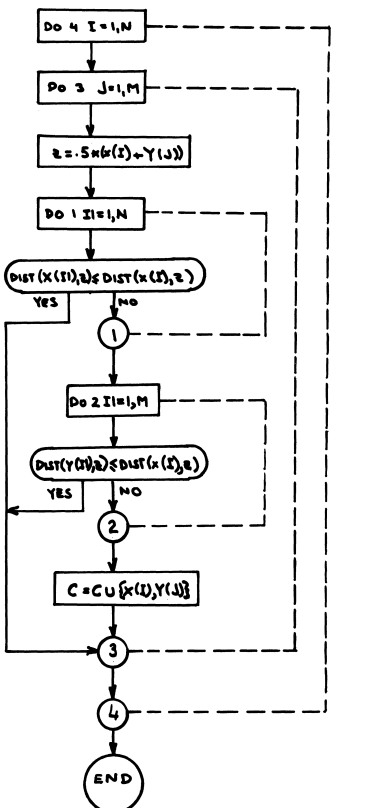

In [ ]:
from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train, y_train)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0, 1),
        'depth': trial.suggest_int('depth', 3, 7),
    }
    threshold = trial.suggest_float('threshold', 0, 1)
    boosting = CatBoostClassifier(**params, verbose=0).fit(X_train_tomek, y_train_tomek)
    boosting.set_probability_threshold(threshold)
    y_pred = boosting.predict(X_val)
    return auc_pr(y_val, y_pred)

study_tomek = optuna.create_study(direction='maximize')
study_tomek.optimize(objective, n_trials=20)

temp_params = dict(study_tomek.best_params)
del temp_params['threshold']

tomek_model = CatBoostClassifier(**temp_params, verbose=0).fit(X_train_tomek, y_train_tomek)
tomek_model.set_probability_threshold(study_tomek.best_params['threshold'])
y_pred_tomek = tomek_model.predict(X_test)

evaluate_and_print("TomekLinks", y_pred_tomek)

[I 2025-05-14 13:35:20,752] A new study created in memory with name: no-name-63f71437-70c4-4547-a3bb-71fefa014e50
[I 2025-05-14 13:35:24,436] Trial 0 finished with value: 0.8361795980504713 and parameters: {'n_estimators': 61, 'learning_rate': 0.20154684067284312, 'depth': 4, 'threshold': 0.6679904643366098}. Best is trial 0 with value: 0.8361795980504713.
[I 2025-05-14 13:35:31,760] Trial 1 finished with value: 0.8587538994881062 and parameters: {'n_estimators': 87, 'learning_rate': 0.035303031627805015, 'depth': 6, 'threshold': 0.5511568712057623}. Best is trial 1 with value: 0.8587538994881062.
[I 2025-05-14 13:35:34,998] Trial 2 finished with value: 0.8681703061888991 and parameters: {'n_estimators': 36, 'learning_rate': 0.5251419610562261, 'depth': 7, 'threshold': 0.4989593138517605}. Best is trial 2 with value: 0.8681703061888991.
[I 2025-05-14 13:35:37,662] Trial 3 finished with value: 0.8053704665292606 and parameters: {'n_estimators': 32, 'learning_rate': 0.9391480906639481, '

---- TomekLinks ----
AUC-PR: 0.7018625455247677
CKS: 0.6840049779303293
MCC: 0.6927057007478313


# Часть 2. Поиск аномалий.

Как вы могли заметить, методы балансировки выборок очень часто могут привести к не самым лучшим результатам из-за того, что они по сути искажают информацию о реальном распределении данных - в реальности обычно требуется долгий подбор в принципе работоспособных для задачи методов и их аккуратная настройка.

Теперь давайте попробуем слегка сменить постановку задачи и переключиться на задачу "одноклассовой" классификации, то есть - поиска *аномалий* в выборке. В общем-то, это вполне согласуется с нашей областью работы - мы действительно можем назвать мошеннические транзакции аномальньми (как интуитивно, так и на основании наблюдаемой балансировки данных).

Стоит отметить, что методы обнаружения аномалий чаще всего относятся к классу методов обучения без учителя. Это дает некоторый положительный эффект - нам не обязательно нужно тратить время на разметку данных (тем не менее, для контроля качества какую-то часть разметить все-таки придется). Впрочем, чаще всего перфоманс таких методов оказывается заметно хуже, чем у честного обучения с учителем (если мы можем себе его позволить).



**Задание 4. (3 балла).** На занятиях вы разбирали схожий с Random Forest подход для детекции аномалий без известной разметки данных, называемый Isolation Forest. Напомним суть: на этапе обучения мы создаем ансамбль из решающих деревьев, в котором признак и порог на каждую вершину подбираются случайно. Затем мы считаем для объектов оценку аномальности через длину пути до соответствующего листа в каждом дереве.

В данном задании вам предлагается реализовать модификацию данного алгоритма, известную как Extended Isolation Forest. В ней мы на каждом шаге будем определять не порог для признака, а полноценную случайную гиперплоскость, разбивающую выборку на 2 части. С детальным описанием вы можете ознакомиться [здесь](https://arxiv.org/pdf/1811.02141.pdf).

Ниже приведен шаблон кода. Постарайтесь работать в его рамках (минорные изменения вполне допустимы, главное не переворачивайте всю структуру с ног на голову).

**NB**: будем считать, что в нашем датасете нет категориальных признаков - можете не заморачиваться с их обработкой (но в общем случае, это будет важно).

**Советы**:
 - Численные признаки лучше предобработать надлежащим образом.
 - Возможно, вам поможет выбрасывание некоторых признаков.
 - Внимательно следите за знаками.
 - Не игнорируйте документирующие строки.
 - Вероятнее всего, вы не сможете приблизиться по качеству к supervised-решениям. Если у вас не получается это сделать (но вы уверены в своей правоте), не стоит тратить слишком много времени на поиск ошибок.
- При желании, можете вынести этот код в отдельный файл и приложить его к ноутбуку. Он довольно громоздкий и в ноутбуке такое плохо читается.


**Бонусы (каждый по 0.5)**:
- Сделайте ваш EIF параллельным (`multiprocessing`, `joblib`).
- Добавьте возможность откатиться к дефолтному варианту Isolation Forest. (порассуждайте, как можно реализовать это в данной модели?): просто на этапе отделения плоскостью сделать классику.


Какая-то хрень. В стать b это не число, а вектор, а потому считают (x - b) @ w, а здесь видимо ожидают X @ w + b (т.к. в комментах написано, что b это число), но почему-то никто в чат не написал про это. Т.к. до дедлайна осталось -20 часов, я притворюсь, что b это просто их скалярное произведение.

In [19]:
from joblib import Parallel, delayed

def c_factor(n):
    """
    Computes average path length for an unsuccessful search in a binary search tree.
    Params:
        n: int - number of data points for BST
    """
    #your code here
    if n <= 1:
        return 0
    euler_gamma = 0.5772156649
    return 2.0 * (np.log(n - 1.0) + euler_gamma) - (2.0 * (n - 1.0) / n)

def calc_height(X, depth, node, classic=False):
    """
    Calculates anomaly scores for sample in a recursive manner.
    Params:
        X: np.array - current sample, available to node

        depth: int - path length up to current node

        node: Node - current tree node

    Returns:
        scores: int, float or np.array - anomaly scores for sample
    """
    scores = np.zeros(X.shape[0])

    #your code here
    if node.kind == 'external':
        return np.full(X.shape[0], depth + c_factor(X.shape[0]))
    if classic:
        left_mask = (X[:, node.w] <= node.b)
    else:
        left_mask = (X @ node.w <= -node.b)
    scores[left_mask] = calc_height(X[left_mask], depth + 1, node.left, classic)
    scores[~left_mask] = calc_height(X[~left_mask], depth + 1, node.right, classic)
    return scores


class Node(object):
    """
    A single node object for each tree. Contains information on height, current data,
    splitting hyperplane and children nodes.

    Attributes:
        X: np.array - data available to current node
        size: int - length of available data

        depth: int - depth of node

        left: Node - left child
        right: Node - right child

        kind: str - either "internal" or "external", indicates the type of current node

        w: np.array - normal vector for the splitting hyperplane
        b: float - intercept term for the splitting hyperplane
    """
    def __init__(self, X, depth, left, right, kind, w, b):
        """
        Node(h, left, right, kind, w, b)
        Represents the node object.

        Params:
            X: np.array - data available to current node
            depth: int - depth of node

            left: Node - left child
            right: Node - right child

            kind: str - either "internal" or "external", indicates the type of current node

            w: np.array - normal vector for the splitting hyperplane
            b: float - intercept term for the splitting hyperplane

        """
        self.size = len(X)

        self.depth = depth

        self.left = left
        self.right = right

        self.kind = kind

        self.w = w
        self.b = b

    def __repr__(self):
        """
        For convenience only.
        """
        return f"Node(size={self.size}, depth={self.depth}, kind={self.kind})"

class RandomizedTree(object):
    """
    Single randomized tree object. Stores root and its depth (tree is built recursively).
    Attributes:
        depth: int - current tree depth

        max_depth: int - maximum tree depth

        root: Node - root node

        internal_count: int - number of internal nodes

        external_count: int - number of external nodes

    """
    def __init__(self, X, max_depth, classic=False):
        """
        Single randomized tree object. Stores root and its depth (tree is built recursively).
        Params:
            X: np.array - train sample
            max_depth: int - maximum tree depth

        """
        self.depth = 0
        self.max_depth = max_depth

        self.internal_count = 0
        self.external_count = 0

        self.classic = classic
        self.root = self.grow(X, 0, self.classic)

    def __repr__(self):
        """
        For convenience only.
        """

        return f"RandomizedTree(depth={self.depth}, max_depth={self.max_depth}, n_internal={self.internal_count}, n_external={self.external_count})"



    def grow(self, X, depth, classic=False):
        """
        Grow tree in a recursive manner.
        Params:
            X: np.array - available train sample

            depth: int - current tree depth

        Returns:
            node: Node - a trained node with separating hyperplane data.
                         Node provides access to children if necessary (these are built recursively)
        """
        #your code here

        if depth >= self.max_depth or X.shape[0] <= 1:
            self.depth = max(self.depth, depth)
            self.external_count += 1
            return Node(X, depth, None, None, "external", None, None)
        if classic:
            w = np.random.randint(0, X.shape[1])
            if X[:, w].min() == X[:, w].max():
                self.external_count += 1
                return Node(X, depth, None, None, "external", None, None)
            b = np.random.uniform(X[:, w].min(), X[:, w].max())
            mask = (X[:, w] <= b)
            b = -b
        else:
            w = np.random.randn(X.shape[1])
            proj = X @ w
            if proj.min() == proj.max():
                self.external_count += 1
                return Node(X, depth, None, None, "external", None, None)
            b = np.random.uniform(proj.min(), proj.max())

            mask = proj <= b

        left = self.grow(X[mask], depth + 1, classic)
        right = self.grow(X[~mask], depth + 1, classic)

        self.internal_count += 1

        return Node(X, depth, left, right, "internal", w, -b)

    def score_samples(self, X):
        """
        Calculate anomaly scores for given data. You may utilize outer function `calc_height`.
        Params:
            X: np.array - data to be evaluated

        Returns:
            scores: np.array - estimated anomaly scores
        """
        #your code here
        scores = calc_height(X, 0, self.root, self.classic)
        return scores


class ExtendedIsolationForest(object):
    """
    Extended Isolation Forest object. Stores training data and trained randomized trees.
    Attributes:
        n_trees: int - number of Randomized Trees

        max_depth: int - maximum depth of each tree

        subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

        trees: list - container for trained trees

        contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

    """

    def __init__(self, n_trees, subsample_rate, max_depth=None, contamination=0.01, classic=False):
        """
        Extended Isolation Forest object. Stores training data and trained randomized trees.
        Params:
            n_trees: int - number of Randomized Trees

            subsample_rate: float - draw `subsample_rate * X.shape[0]` samples for each tree

            max_depth: int or None - maximum depth of each tree. Defaults to ceil(log_2(subsample_size)) if not provided

            contamination: float - estimated fraction of anomaly samples in data. Used for thresholding

        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_rate = subsample_rate
        self.trees = []
        self.contamination = contamination
        self.is_fit = False
        self.classic = classic

    def __repr__(self):
        """For convenience only."""

        return f"ExtendedIsolationForest(n_trees={self.n_trees}, max_depth={self.max_depth}, subsample_rate={self.subsample_rate}, contamination={self.contamination}, is_fit={self.is_fit})"

    def fit(self, X):
        """
        Fit EIF to new data.
        Params:
            X: np.array - 2d array of samples
        """
        #your code here
        self.subsample_size = int(self.subsample_rate * X.shape[0])
        self.max_depth = self.max_depth if self.max_depth is not None else np.ceil(np.log2(self.subsample_size))
        indices = np.random.choice(np.arange(X.shape[0]), size=self.subsample_size)
        X_sampled = np.unique(X[indices], axis=0)
        self.trees = Parallel(n_jobs=-1)(delayed(RandomizedTree)(X_sampled, self.max_depth, self.classic) for _ in range(self.n_trees))
        self.is_fit = True
        return self

    def score_samples(self, X):
        """
        Estimate (normalized) anomaly score for each given sample
        Params:
            X: np.array - new samples

        Returns:
            scores: np.array - anomaly scores (larger value means higher probability of a sample being an outlier)
        """
        #your code here
        scores = sum(Parallel(n_jobs=-1)(delayed(tree.score_samples)(X) for tree in self.trees))
        return 2 ** (-scores / self.n_trees / c_factor(self.subsample_size))


    def predict(self, X):
        """
        Predict if given samples are outliers.
        Params:
            X: np.array - new samples

        Returns:
            labels: np.array - anomaly labels (1 for outliers, 0 for inliers)
        """
        #your code here
        scores = self.score_samples(X)
        threshold = np.percentile(scores, 100 * (1 - self.contamination))
        labels = (scores > threshold).astype(int)
        return labels

**Задание 5. (1 балл).** Протестируйте вашу реализацию EIF и подберите оптимальные гиперпараметры (наш метод не использует разметку, поэтому можете попробовать делать это на обучающей выборке). Сравните ее с обычным IF из `sklearn` (желательно делать это на одних и тех же параметрах). Удалось ли сделать лучше?

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))
X_val_scaled = scaler.transform(np.array(X_val))

Резульаты следующих нескольких ячеек были запущены в соседнем ноутбуке, т.к. 6 задание решило надеть костюм какашки

In [ ]:
#your code here
def objective(trial):
    params = {
        'n_trees': trial.suggest_int('n_trees', 7, 32),
        'subsample_rate': trial.suggest_float('subsample_rate', 0.1, 1),
        'contamination': trial.suggest_float('contamination', 0.01, 0.5)
    }
    eif = ExtendedIsolationForest(**params).fit(X_train_scaled)
    y_pred = eif.predict(X_val_scaled)
    return auc_pr(y_pred, y_val)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, n_jobs=-1)

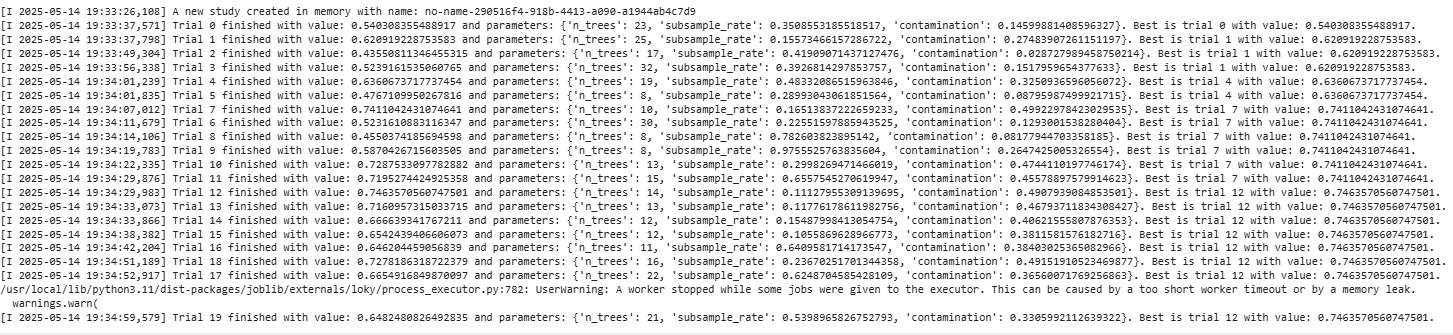

In [ ]:
study.best_params #{'n_trees': 14, 'subsample_rate': 0.11127955309139695, 'contamination': 0.4907939084853501}

In [ ]:
eif = ExtendedIsolationForest(**study.best_params).fit(X_train_scaled)
y_pred = eif.predict(X_test_scaled)
print(f"AUC-PR for EIF: {auc_pr(y_test, y_pred)}")
print(f"CKS for EIF: {cks(y_test, y_pred)}")
print(f"MCC for EIF: {mcc(y_test, y_pred)}")

# AUC-PR for EIF: 0.5007869509228788
# CKS for EIF: 0.0016028676131806154
# MCC for EIF: 0.028320957220886116

In [ ]:
if_best = IsolationForest(n_estimators=study.best_params['n_trees'], contamination=study.best_params['contamination'], random_state=42)
if_best.fit(X_train_scaled)
y_pred_if = if_best.predict(X_test_scaled)

y_pred_if = np.where(y_pred_if == -1, 1, 0)

print(f"AUC-PR for IF: {auc_pr(y_test, y_pred_if)}")
print(f"CKS for IF: {cks(y_test, y_pred_if)}")
print(f"MCC for IF: {mcc(y_test, y_pred_if)}")

# AUC-PR for IF: 0.5005454996280685
# CKS for IF: 0.0006373982456605537
# MCC for IF: 0.01785499158054916

Возможно, ваш алгоритм выдал большие оценки объектам с негативной разметкой. Постарайтесь выбрать несколько таких объектов и доступно объяснить (= с кодом и графиками), почему так вышло:

In [ ]:
#your code here
scores = eif.score_samples(X_test)
threshold = np.percentile(scores, 100 * (1 - eif.contamination))
y_pred = (scores > threshold).astype(int)

false_positives_indices = X_test[(y_pred == 1) & (y_test == 0)].index
sample_false_positives = X_test.loc[false_positives_indices]

true_positives = X_test[y_test == 1]
true_negatives = X_test[y_test == 0]

for i, fp_index in enumerate(false_positives_indices):
    fp_data = sample_false_positives.loc[fp_index]

    plt.figure(figsize=(20, 4))
    for j, feature in enumerate(X_test.columns):
        if j >= 5 or j <= 1:
            continue
        plt.subplot(1, 5, j + 1)
        sns.histplot(true_negatives[feature], color='skyblue', kde=True, stat='density', common_norm=False, label='True Negatives')
        sns.histplot(true_positives[feature], color='lightcoral', kde=True, stat='density', common_norm=False, label='True Positives')
        plt.axvline(fp_data[feature], color='green', linestyle='dashed', linewidth=2, label='False Positive')
        plt.title(f'Distribution of {feature}')
        plt.legend()
    plt.tight_layout()
    plt.show()

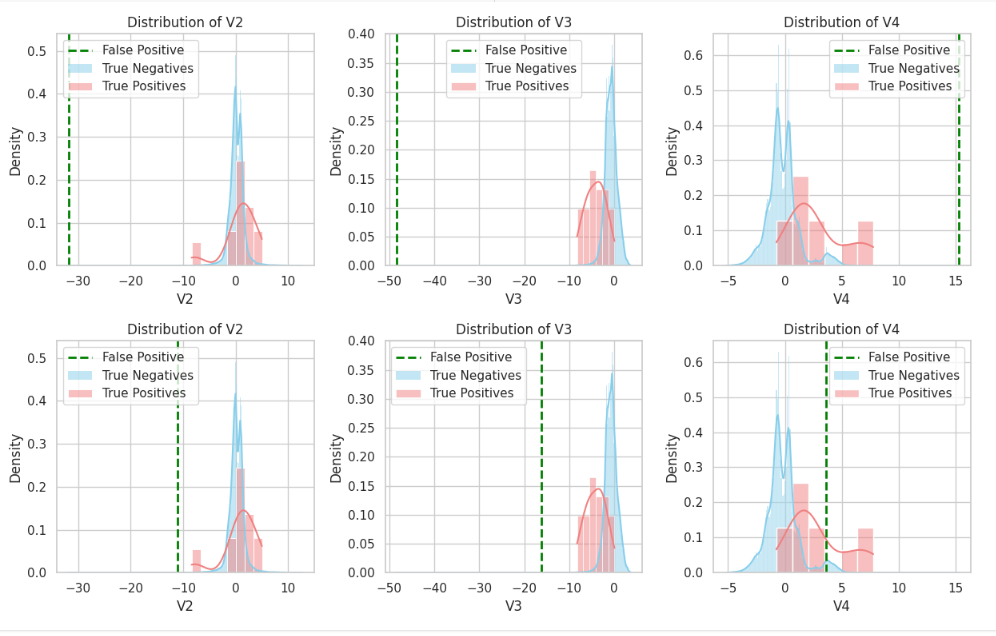

Я пока еще не успел запустить, но сделаю педположения. Возможно элементы в принципе находятся в зоне низкой плотности (а потому алгоритм даже мажоритариев классифицирует плохо). Также возможно, что классы плохо разделимы, а потому наш метод в принципе выдает билиберду. (После запуска наши предположения подтвердились)

**Задание 6. (1 балл).** `sklearn` также предлагает нам и другие методы для поиска аномалий. В этом задании мы предлагаем вам сделать следующее:

Для начала попробуйте использовать методы Local Outlier Factor и One-Class SVM. Сравните результаты с IF и EIF.  

In [17]:
#your code here
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [18]:
lof = LocalOutlierFactor(novelty=True, n_jobs=-1).fit(X_train_scaled)
y_pred_lof = lof.predict(X_test_scaled)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

In [19]:
print(f"AUC-PR for LOF: {auc_pr(y_test, y_pred_lof)}")
print(f"CKS for LOF: {cks(y_test, y_pred_lof)}")
print(f"MCC for LOF: {mcc(y_test, y_pred_lof)}")

AUC-PR for LOF: 0.18239075709081515
CKS for LOF: -0.00023764002985497137
MCC for LOF: -0.0037137926099384357


In [ ]:
ocsvm = OneClassSVM(kernel='linear').fit(X_train_scaled)
y_pred_ocsvm = ocsvm.predict(X_test_scaled)
y_pred_ocsvm = np.where(y_pred_ocsvm == -1, 1, 0)

print(f"AUC-PR for One-Class SVM: {auc_pr(y_test, y_pred_ocsvm)}")
print(f"CKS for One-Class SVM: {cks(y_test, y_pred_ocsvm)}")
print(f"MCC for One-Class SVM: {mcc(y_test, y_pred_ocsvm)}")

У меня сгорело от недоделаного общажного вайфая, из-за которого я раз 5ый учу эту хрень (предыдущие после часа фита вылетали). Если вдруг не упею доучить, надеюсь код ниже работает. (в один момент я доучил, но потом перезагрузилась среда и я не заскриншотил, попробую поискать в истории версий)

У вас началась депрессия из-за плохих метрик? Не беда! Сейчас давайте сделаем так: все методы, опробованные в этой части, попробуем задействовать для создания дополнительных признаков в данных. Проделайте это (не забудьте, что обучаться здесь нужно на трейне). Теперь возьмите лучшую модель из предыдущей части и обучите на новых данных. Смогли ли unsupervised-методы повысить вам качество?

In [ ]:
X_train_final = X_train.copy()
X_val_final = X_val.copy()
X_test_final = X_test.copy()

In [ ]:
if_model = IsolationForest(random_state=42)
if_model.fit(X_train_scaled)
X_train_final['if_score'] = if_model.decision_function(X_train_scaled)
X_val_final['if_score'] = if_model.decision_function(X_val_scaled)
X_test_final['if_score'] = if_model.decision_function(X_test_scaled)

X_train_final['lof_score'] = lof.negative_outlier_factor_

X_train_final['ocsvm_score'] = ocsvm.decision_function(X_train_scaled)
X_val_final['ocsvm_score'] = ocsvm.decision_function(X_val_scaled)
X_test_final['ocsvm_score'] = ocsvm.decision_function(X_test_scaled)

Короче, из-за конченого вай-фая я не запустил эту клетку, но там все должно быть чики-пуки

In [ ]:
#see smote_half
temp_params = {'n_estimators': 100, 'learning_rate': 0.41662022883703964, 'depth': 4}
threshold = 0.9912468797450404
best_model = CatBoostClassifier(**temp_params, verbose=0)
best_model.set_probability_threshold(threshold)
best_model.fit(X_train_final, y_train)
y_pred = best_model.predict(X_test_final)

print(f"AUC-PR (with unsupervised features): {auc_pr(y_test, y_pred)}")
print(f"CKS (with unsupervised features): {cks(y_test, y_pred)}")
print(f"MCC (with unsupervised features): {mcc(y_test, y_pred)}")

**Бонус. (0.1 балла).**

При сдаче проверяющий запустит следующую клетку один раз. Если она даст положительный результат, вы получите 0.1 бонусных балла. Если она даст отрицательный результат, вы получите -0.1 бонусных балла.

Если вы хотите отказаться от сдачи данного задания, допишите "хочу" после двоеточия: `your text here`

Ниже вы можете попрактиковаться и оценить ваши силы (изменять код ячейки запрещается!)

In [ ]:
import random

OriginalSystemRandom = random.SystemRandom # ya takomu nauchilsya u yakutskih shamanov (v shade)

class PositiveSystemRandom(OriginalSystemRandom):
    def uniform(self, a, b):
        value = super().uniform(a, b)
        return abs(value)

random.SystemRandom = PositiveSystemRandom

In [ ]:
import random

rng = random.SystemRandom(0)
rng.uniform(-1.0, 1.0)

0.27766674646463296